In [1]:
# importing the libraries
import numpy as np
import torch 
from torch import nn
from torch.nn import functional as F
import matplotlib.pyplot as plt

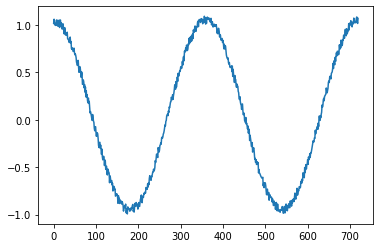

In [2]:
#dataset
x = np.arange(720)
y = np.cos(np.radians(x)) + np.random.rand(720)*0.1
plt.figure()
plt.plot(x,y,label='cos')
plt.show()

In [3]:
# data pre-processing
X = []
Y = []
for i in range(y.shape[0]-10):
  lis = []
  for j in range(i,i+10):
    lis.append(y[j])
  X.append(lis)
  Y.append(y[i+10])

X = np.array(X)
Y = np.array(Y)

In [4]:
# network
class net(nn.Module):
  def __init__(self):
    super(net,self).__init__()
    self.l1 = nn.LSTM(input_size=1,hidden_size=20,num_layers=1,batch_first=True)
    self.l2 = nn.Linear(in_features=20,out_features=1)
  
  def forward(self,x):
    x,_ = self.l1(x)
    x = self.l2(torch.relu(x[:,-1]))
    return x

model = net()

In [5]:
# converting to tensor
X = torch.tensor(X,dtype=torch.float32).reshape(-1,10,1)
Y = torch.tensor(Y)

In [6]:
# model params
epochs = 3000
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)
criterion = nn.MSELoss()

In [7]:
# forward loop
for i in range(epochs):
  y_pred = model(X)
  cost = criterion(y_pred,Y.reshape(-1,1).float())
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  if i == 500:
    optimizer.lr = 0.005
  if i%500 == 0:
    print(cost)

tensor(0.4917, grad_fn=<MseLossBackward>)
tensor(0.0426, grad_fn=<MseLossBackward>)
tensor(0.0072, grad_fn=<MseLossBackward>)
tensor(0.0046, grad_fn=<MseLossBackward>)
tensor(0.0034, grad_fn=<MseLossBackward>)
tensor(0.0029, grad_fn=<MseLossBackward>)


In [8]:
# test set
x = np.arange(720,1000)
y = np.cos(np.radians(x)) + np.random.rand(280)*0.1

In [9]:
# testing pre-processing
X_test = []
Y_test = []
for i in range(y.shape[0]-10):
  lis = []
  for j in range(i,i+10):
    lis.append(y[j])
  X_test.append(lis)
  Y_test.append(y[i+10])

X_test = np.array(X_test)
Y_test = np.array(Y_test)

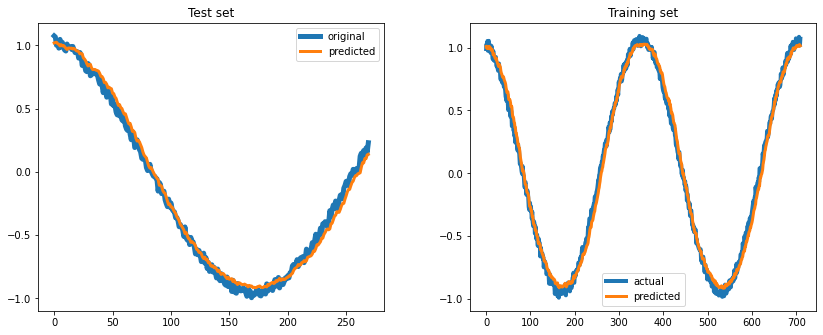

In [10]:
# test and train predictions
fig = plt.figure(figsize=(12,4))
# test plot
ax1 = fig.add_axes([0,0,0.4,1])
ax1.plot(Y_test,label='original',linewidth=5)
ax1.plot(model(torch.tensor(X_test,dtype=torch.float32).reshape(-1,10,1)).detach().numpy(),label='predicted',linewidth=3)
plt.title("Test set")
plt.legend()

#training set plot
ax2 = fig.add_axes([0.5,0,0.4,1])
ax2.plot(Y,label='actual',linewidth=4)
ax2.plot(y_pred.detach().numpy(),label='predicted',linewidth=3)
plt.legend()
plt.title("Training set")
plt.show()